Bienvenido al ajedrez!
Elija una opcion:
1.-Desea generar cadenas aleatorias
2.-Desea ingresar las cadenas


 2


Recualculando Ruta...


Ingresa tu cadena:  bb


El camino que tomara el blanco es: ['q5', 'q9']
Recualculando Ruta...


Ingresa tu cadena:  bb


El camino que tomara el negro es: ['q5', 'q1']


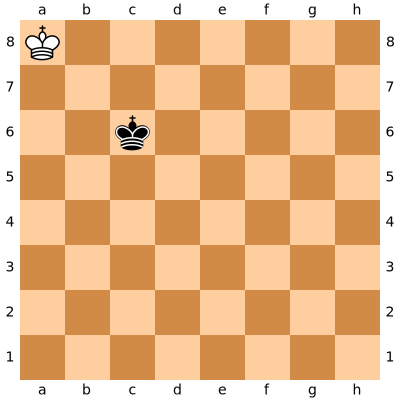

Turno del blanco
Esta en la casilla: q1 La siguiente jugada es: q5


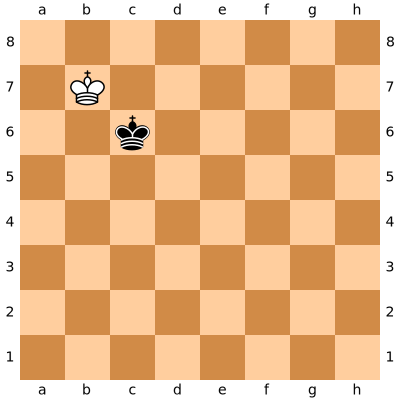

Turno del negro
Esta en la casilla: q9 La siguiente jugada es: q5
Recualculando Ruta...


Ingresa tu cadena:  b


Cadena no valida


Ingresa tu cadena:  br


Cadena no valida


Ingresa tu cadena:  rbr


Cadena no valida


Ingresa tu cadena:  rrb


Esta en la casilla: q9 La siguiente jugada es: q6


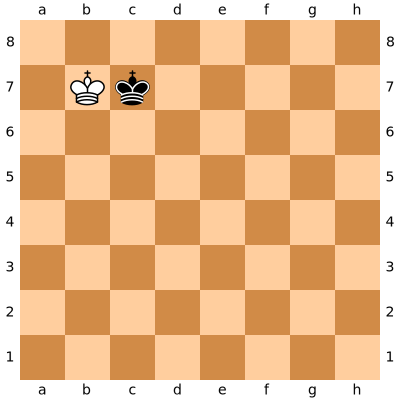

Turno del blanco
Esta en la casilla: q5 La siguiente jugada es: q9


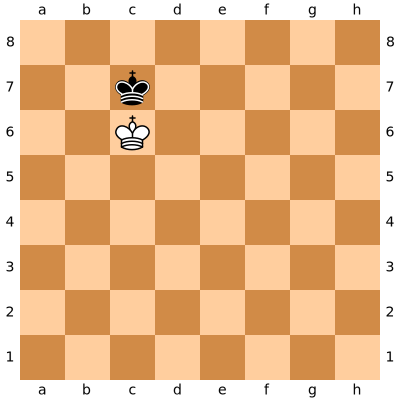

Gano el blanco!


In [7]:
import random
import string
from graphviz import Digraph
import chess
import chess.svg
from IPython.display import SVG, display

class NFA(object):
  def __init__(self, Q, sigma, delt, q_0, F):
    Q_list = []
    for i in range(Q):
        Q_list.append("q"+str(i+1))
    self.Q = Q_list
    self.sigma = sigma
    self.delta = delt
    self.completar_diccionario()
    self.q_0 = q_0
    self.F = F
    self.estado_actual = [q_0]
    self.camino = []
  def get_estado_actual(self):
      return self.estado_actual

  def set_estado_actual(self, estado_actual):
    self.estado_actual = estado_actual

  def get_F(self):
    return self.F

  def completar_diccionario(self):
    sigmaTemp = self.sigma
    sigmaTemp.append(chr(1013))
    for i in self.delta.keys():
      if "rest" in self.delta[i].keys():
        for j in self.sigma:
          if j == chr(1013) and not (j in self.delta[i].keys()):
            self.delta[i][j] = None
            continue
          if not (j in self.delta[i].keys()):
            self.delta[i][j] = self.delta[i]["rest"]
        self.delta[i].pop("rest")
      else:
        for j in sigmaTemp:
          if not j in self.delta[i].keys():
            self.delta[i][j] = None

  def prueba(self, cadena):
    indice = 0
    for i in cadena:
      #print("Bit leido de la cadena: " + i)
      estado_actual = self.get_estado_actual()
      print("Estado actual: " + str(estado_actual))
      estado_siguiente = []
      
      for estados in estado_actual:
        if estados == None:
          continue
        conexionesTemp = self.delta[estados][i]
        if conexionesTemp != None:
          if isinstance(conexionesTemp, list):
            for sig_estados in conexionesTemp:
              estado_siguiente.append(sig_estados)
          else:
            estado_siguiente.append(conexionesTemp)
        if conexionesTemp == None:
          estado_siguiente.append(None)
        episilon = conexionesTemp = self.delta[estados][chr(1013)]
        if episilon == None:
          continue
        if isinstance(episilon ,list):
          for estados in episilon:
              estado_siguiente.append(estados)
        else:
          estado_siguiente.append(episilon)
        
      #print("Los siguientes estados " + str(estado_siguiente))
      self.set_estado_actual(estado_siguiente)
      indice +=1
    for i in self.get_estado_actual():
      if i in self.get_F():
        return True
    return False
  

  def pruebaRecursiva(self, cadena, estadoActual):
    if cadena == "":
      if estadoActual in self.get_F():
        return True
      else:
        return False
    siguientesEstados = self.delta[estadoActual][cadena[0]]
    if isinstance(siguientesEstados, list):
      for estado in siguientesEstados:
        if self.pruebaRecursiva(cadena[1:],estado):
          self.camino.append(estado)
          return True
        
    else:
      if self.pruebaRecursiva(cadena[1:], siguientesEstados):
        self.camino.append(siguientesEstados)
        return True
      else:
        return False
  
  def drawn(self):
    # inicializa el diagrama
    f = Digraph('finite_state_machine', filename='fsm.gv', format='png')
    f.attr(rankdir='LR', size='8,5')
    # Dibuja los nodos finales con doblecirculo
    f.attr('node', shape='doublecircle')
    for i in self.F:
        f.node(i)
    f.attr('node', shape='circle')
    f.attr('edge', )
    # Agrega todos los nodos de todos los estados
    for key in self.delta.keys():
        f.node(key)
    #Agrega todas las conexiones
    #Cuando una misma conexion tiene varios inputs los une en una sola flecha
    for estado, conexiones in self.delta.items():
      for nombre, conex in conexiones.items():
        if conex == None:
          continue
        if isinstance(conex,list):
          for i in conex:
            f.edge(estado,i,nombre)
        else:
          f.edge(estado,conex,nombre)

            
    #Se crea un nodo transparente para poner la flecha del estado inicial
    f.attr('node', style='filled')
    f.attr('node', color='white')
    f.edge('', self.q_0)
    f.view()


print("Bienvenido al ajedrez!")
print("Elija una opcion:\n1.-Desea generar cadenas aleatorias\n2.-Desea ingresar las cadenas")
opc = input()
if opc == "1":
  elegir=False
else:
  elegir = True


def generarCadena(ingresar = False, automata = None, estado = None):
  if not ingresar:
    cad = ""
    tam = random.randint(2,10)
    for i in range(tam):
      if random.randint(0,1):
        cad+="r"
      else:
        cad+="b"
    cad+="b"
    return cad
  while 1:
    cad = input("Ingresa tu cadena: ")
    if automata.pruebaRecursiva(cad, estado):
      #automata.camino.clear()
      automata.camino.reverse()
      return cad
    else:
      print("Cadena no valida")
      automata.camino.clear()

q = 9
sigma = ["r", "b"]
delta = {
    "q1" : {"r": ["q2","q4"], "b": "q5"},
    "q2" : {"r": ["q4","q6"], "b": ["q1","q3","q5"]},
    "q3" : {"r": ["q2","q6"], "b": "q5"},
    "q4" : {"r": ["q2","q8"], "b": ["q1","q5","q7"]},
    "q5" : {"r": ["q2","q4","q6","q8"], "b": ["q1","q3","q7","q9"]},
    "q6" : {"r": ["q2","q8"], "b": ["q3","q5","q9"]},
    "q7" : {"r": ["q4","q8"], "b": "q5"},
    "q8" : {"r": ["q4","q6"], "b": ["q5","q7","q9"]},
    "q9" : {"r": ["q6","q8"], "b": "q5"},
}
q_0 = "q1"
F = ["q9"]
automata1 = NFA(q, sigma, delta, q_0, F)
q_0N = "q9"
F_N = ["q1"]
automata2 = NFA(q, sigma, delta, q_0N, F_N)


'''if elegir:
  cadenaBlanco=generarCadena(True, automata1,automata1.q_0)
  cadenaNegro=generarCadena(True, automata2, automata2.q_0)
else:
  cadenaBlanco=generarCadena()
  cadenaNegro=generarCadena()'''

def recalcularRuta(automata, estadoA, noTocar):
  print("Recualculando Ruta...")
  while 1:
    automata.camino.clear()
    if elegir:
      nuevaRuta = generarCadena(True, automata, estadoA)
      break
    else:
        nuevaRuta = generarCadena()
    if automata.pruebaRecursiva(nuevaRuta, estadoA):
      automata.camino.reverse()
      if automata.camino[0] != noTocar:
        print("La nueva ruta es: " + str(automata.camino))
        return
recalcularRuta(automata1, automata1.q_0, automata2.q_0)
print("El camino que tomara el blanco es: "+ str(automata1.camino))
recalcularRuta(automata2, automata2.q_0, automata1.q_0)
print("El camino que tomara el negro es: " + str(automata2.camino))

casillas = {
  "q1": "a8",
  "q2": "b8",
  "q3": "c8",
  "q4": "a7",
  "q5": "b7",
  "q6": "c7",
  "q7": "a6",
  "q8": "b6",
  "q9": "c6",
}
board = chess.Board()
board.clear()
board.set_piece_at(chess.A8, chess.Piece.from_symbol("K"))
board.set_piece_at(chess.C6, chess.Piece.from_symbol("k"))
display(SVG(chess.svg.board(board=board)))

#Vamos a jugar!!!!!!!!

turno = 0
i=0 #indice de la lista del automata1
j = 0 #indice de la lista del automata2
estadoActual1 = automata1.q_0
estadoActual2 = automata2.q_0
while True:
    #Tira el blanco
  if turno == 0:
    siguienteJugada = automata1.camino[i]
    print("Turno del blanco")
    print("Esta en la casilla: " + estadoActual1+ " La siguiente jugada es: " + siguienteJugada)
    i+=1
    if siguienteJugada == estadoActual2:
      recalcularRuta(automata1, estadoActual1, estadoActual2)
      i=0
      automata2.camino = automata2.camino[j:]
      j=0
      siguienteJugada = automata1.camino[i]
      i+=1
      print("Esta en la casilla: " + estadoActual1+ " La siguiente jugada es: " + siguienteJugada)
    movimiento = chess.Move.from_uci(casillas[estadoActual1]+casillas[siguienteJugada])
    board.push(movimiento)
    display(SVG(chess.svg.board(board=board)))
    estadoActual1 = siguienteJugada
    if siguienteJugada in automata1.F:
      print("Gano el blanco!")
      break        
    #Tira el blanco
  if turno == 1:
    siguienteJugada = automata2.camino[j]
    print("Turno del negro")
    print("Esta en la casilla: " + estadoActual2+ " La siguiente jugada es: " + siguienteJugada)
    j+=1
    if siguienteJugada == estadoActual1:
      recalcularRuta(automata2,estadoActual2, estadoActual1)
      j = 0
      automata1.camino = automata1.camino[i:]
      i=0
      siguienteJugada = automata2.camino[j]
      j+=1
      print("Esta en la casilla: " + estadoActual2+ " La siguiente jugada es: " + siguienteJugada)
    movimiento = chess.Move.from_uci(casillas[estadoActual2]+casillas[siguienteJugada])
    board.push(movimiento)
    display(SVG(chess.svg.board(board=board)))
    estadoActual2 = siguienteJugada
    if siguienteJugada in automata2.F:
      print("Gano el negro!")
      break
  turno = 1 - turno